# Prueba Intertrimestral

**Nombre:**  
**Apellidos:**  

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error, mean_squared_error, classification_report, accuracy_score, confusion_matrix
from itertools import combinations
from sklearn.linear_model import SGDClassifier, LogisticRegression
import plotly.graph_objects as go

# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [27]:
def imc(weight, height):
    return round(weight/(height*height),2)

imc(50,1.60)

19.53

b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [28]:
def saludable(imcValue):
    if imcValue<=24.9:
        if imcValue>=18.5:
            return "Saludable"
        return "Bajo peso"
    return "Sobrepeso"
saludable(35)

'Sobrepeso'

c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [29]:
n = 10
peso = np.random.uniform(45,100,n)
altura = np.random.uniform(1.50,2.0,n)

resultados = []

for i in range(0,n):
    bmi_n = [peso[i], altura[i], imc(peso[i], altura[i]), saludable(imc(peso[i], altura[i]))]
    resultados.append(bmi_n)
resultados
    

[[np.float64(63.21413334158893),
  np.float64(1.569243241969103),
  np.float64(25.67),
  'Sobrepeso'],
 [np.float64(56.84321150891922),
  np.float64(1.9098913463826102),
  np.float64(15.58),
  'Bajo peso'],
 [np.float64(46.97151852778244),
  np.float64(1.774520594986179),
  np.float64(14.92),
  'Bajo peso'],
 [np.float64(89.93675493339033),
  np.float64(1.976726288077177),
  np.float64(23.02),
  'Saludable'],
 [np.float64(65.69709576652102),
  np.float64(1.8030008124864625),
  np.float64(20.21),
  'Saludable'],
 [np.float64(61.23886172069928),
  np.float64(1.5178405051483899),
  np.float64(26.58),
  'Sobrepeso'],
 [np.float64(50.525963112019284),
  np.float64(1.7110699694218976),
  np.float64(17.26),
  'Bajo peso'],
 [np.float64(83.39049427948345),
  np.float64(1.6881238361788573),
  np.float64(29.26),
  'Sobrepeso'],
 [np.float64(63.88561614326684),
  np.float64(1.8484274191375771),
  np.float64(18.7),
  'Saludable'],
 [np.float64(55.88534019676592),
  np.float64(1.6939870838106823),


In [30]:
df = pd.DataFrame(resultados, columns=['peso', 'altura', 'imc', 'categoria'])
df.head(10)

,peso,altura,imc,categoria
0,63.214133,1.569243,25.67,Sobrepeso
1,56.843212,1.909891,15.58,Bajo peso
2,46.971519,1.774521,14.92,Bajo peso
3,89.936755,1.976726,23.02,Saludable
4,65.697096,1.803001,20.21,Saludable
5,61.238862,1.517841,26.58,Sobrepeso
6,50.525963,1.711070,17.26,Bajo peso
7,83.390494,1.688124,29.26,Sobrepeso
8,63.885616,1.848427,18.70,Saludable
9,55.885340,1.693987,19.48,Saludable


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [31]:
class HealthTools:
    def __init__(self, lista_peso_altura):
        """
        Inicializa la clase con una lista de lista de [[peso, altura], ]

        Parámetros:
        - lista_peso_altura: lista de listas de pesos y alturas
        """
        self.lista_peso_altura = lista_peso_altura
        
    def imc(self, weight, height):
        """
        Calcula el imc de una persona a partir de un peso en kg y una altura en metros

        Parámetros:
        - weight: peso en kg
        - height: altura en metros
        """
        return round(weight/(height*height),2)
    
    def saludable(self, imcValue):
        """
        Determina si una persona es sana respecto de su IMC

        Parámetros:
        - IMC: valor de su IMC
        """
        if imcValue<=24.9:
            if imcValue>=18.5:
                return "Saludable"
            return "Bajo peso"
        return "Sobrepeso"


    pass

## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [32]:
df = pd.read_csv('Final_data.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [33]:
print('Número de (filas, columnas) =', df.shape)

Número de (filas, columnas) = (20000, 54)


b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [34]:
def describeData(df):
    print('Tipo de datos')
    print(df.dtypes)
    print('Número de valores nulos')
    print(df.isna().sum())
    print('Porcentaje de nulos')
    print(df.isna.sum()/(df.notna.sum()+df.isna.sum())*100,'%')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         19999 non-null  float64
 5   Avg_BPM                         19999 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [36]:
df.dropna(inplace=True)

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

In [37]:
df_corr = df.select_dtypes('number').corr()

<Axes: >

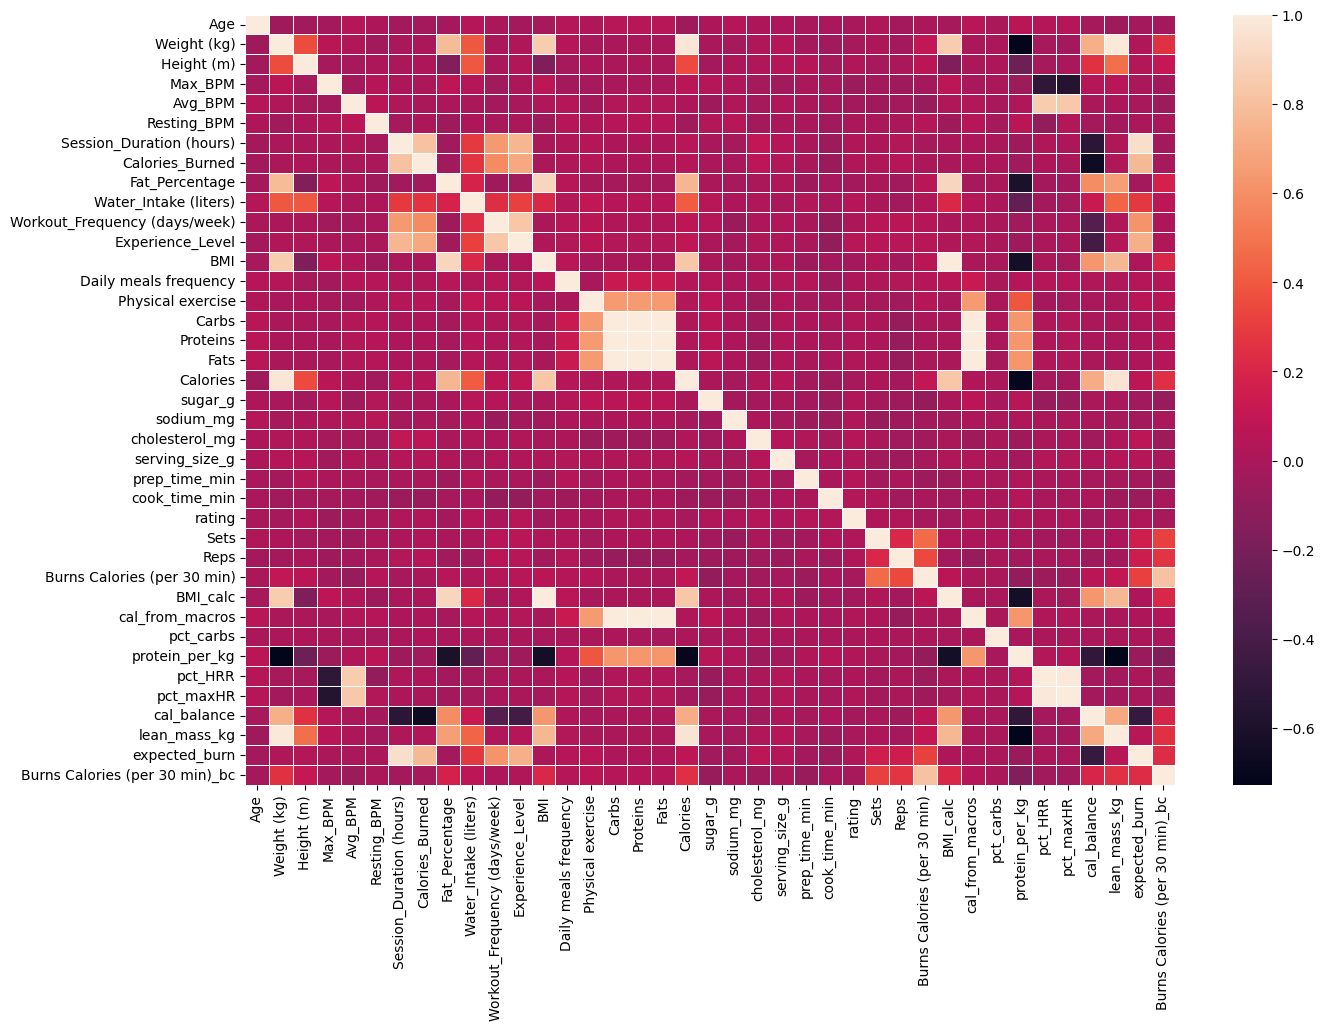

In [38]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(df_corr, ax=ax, linewidths=.5)

In [39]:
df_corr['BMI'].sort_values()

protein_per_kg                   -0.634637
Height (m)                       -0.166922
Resting_BPM                      -0.040765
prep_time_min                    -0.039219
rating                           -0.030547
Reps                             -0.030145
cook_time_min                    -0.028106
sodium_mg                        -0.020803
Age                              -0.017097
pct_maxHR                        -0.015224
Physical exercise                -0.010703
pct_carbs                        -0.006471
pct_HRR                          -0.004794
Calories_Burned                  -0.004436
Session_Duration (hours)         -0.004170
Carbs                            -0.003796
Fats                             -0.003763
cal_from_macros                  -0.003740
Proteins                         -0.003563
cholesterol_mg                    0.000359
Workout_Frequency (days/week)     0.000379
sugar_g                           0.000878
expected_burn                     0.012775
Experience_

La correlación más grande con el BMI es el porcentaje de grasa corporal, seguido de las calorias consumidas, y la lean mass, junto con tener un balance calórico equilibrado. Hay otra correlación importante con no tener alta la proteína por KG (consumo diario dividido entre peso), porque el peso es función del IMC en el denominador.

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [40]:
X = df[['Fat_Percentage', 'Calories', 'lean_mass_kg']]
y = df['BMI']
#Las 3 que tienen mayor correlación en valor absoluto

b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [42]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 (explica la varianza, cuanto más cerca de 1 mejor):', r2)
print('MSE (cuánto se desvía de media el modelo de la realidad, en unidades al cuadrado):', mse)

R2 (explica la varianza, cuanto más cerca de 1 mejor): 0.869666124992633
MSE (cuánto se desvía de media el modelo de la realidad, en unidades al cuadrado): 5.830767160519388


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [43]:
regr = RandomForestRegressor(100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Variance explanation R^2 = {}".format(round(regr.score(X_test, y_test), 2)))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Variance explanation R^2 = 0.9
Mean squared error: 4.59


Funciona mejor el Random Forest ya que tiene mejor R2 y menor MSE que el modelo lineal, aunque es menos interpretable para las personas.

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [44]:
df['bmiHealthy'] = df['BMI'].apply(lambda x: 1 if (x<=24.9 and x>=18.5) else 0)

In [45]:
df['bmiHealthy'].head()

0    1
1    1
2    1
3    0
4    0
Name: bmiHealthy, dtype: int64

b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [46]:
df_corr = df.select_dtypes('number').corr()
df_corr['bmiHealthy'].sort_values()

BMI_calc                         -0.343030
BMI                              -0.343028
Fat_Percentage                   -0.326021
Weight (kg)                      -0.289893
Calories                         -0.276086
cal_balance                      -0.273470
lean_mass_kg                     -0.228412
Burns Calories (per 30 min)_bc   -0.070122
Water_Intake (liters)            -0.070017
Age                              -0.053444
Daily meals frequency            -0.049555
Max_BPM                          -0.040817
Resting_BPM                      -0.028321
serving_size_g                   -0.027946
Avg_BPM                          -0.021411
Burns Calories (per 30 min)      -0.010929
Reps                             -0.010835
sugar_g                          -0.005871
Proteins                         -0.002455
Fats                             -0.002373
cal_from_macros                  -0.002291
Carbs                            -0.002177
Sets                              0.000917
pct_maxHR  

In [49]:
X = df[['Calories', 'cal_balance', 'Workout_Frequency (days/week)']]
y = df['bmiHealthy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
clf_log = LogisticRegression(max_iter=10000, tol=0.1)
clf_log.fit(X_train, y_train)
predictions = clf_log.predict(X_test)

print("Classification report")
print(classification_report(y_test, predictions))

Classification report
              precision    recall  f1-score   support

           0       0.63      0.90      0.74      3692
           1       0.51      0.17      0.25      2308

    accuracy                           0.62      6000
   macro avg       0.57      0.53      0.50      6000
weighted avg       0.59      0.62      0.55      6000



c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


In [50]:
print('Accuracy')
print(accuracy_score(y_test, predictions))

print("Confusion matrix")
print(confusion_matrix(y_test, predictions))

Accuracy
0.6185
Confusion matrix
[[3324  368]
 [1921  387]]


d) (0.75 pts) Explica qué variable parece influir más según el modelo.

In [51]:
lmc = clf_log.coef_

# Plot for LM
objects = X.columns
y_pos = np.arange(len(objects))
coefficients = lmc[0]


fig = go.Figure()

# Agrego las trazas necesarias
fig.add_trace(
    go.Bar(
        x = coefficients,
        y = objects,
        name = "Coeficientes",
        orientation='h'
    )
)

# Actualizo el diseño
fig.update_layout(title = "GLM coefficients importance", xaxis_title = "Coeficientes normalizados", yaxis_title = "Variables")

# Muestro la figura
fig.show()

plt.show()

La variable que tiene más fuerza en predecir es la que tiene el coeficiente más grande, en este caso cal_balance, seguido de calories y por último fat percentage. Si quieres estar sano, que es lo que indica esta variable, lo mejor es que te centres en el balance calórico más que en entrenar más o comer menos. Es una combinación de ambas.

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.



Los mejores hábitos que contrinuyen a una buena salud es el balance calórico. Hay una expresión en inglés "You can't outrun a bad diet", y debería haber otra que fuese igual pero de nutrición sin estar activo. La combinación de ambas es clave para estar sano, no sólo una u otra. Hay que hacer un balance de lo que entra vs lo que sale.

El modelo más eficaz que he desarrollado en este examen es el random forest para hacer una regresión de el IMC, en cuanto a clasificación no ha explicado muy bien, teniendo sólo una precisión del 62%.

Si tuviese más tiempo:
- Terminaría el examen.
- Refinaría los modelos, especialmente con algún tipo de regresión que no fuese logística (igual kMeans?)